# Bagging

Le Bagging est le procédé d'extraire d'un ensemble un sous-ensemble plus petit. On crée ce sous-ensemble aléatoirement, grâce à un tirage avec remise.
Nous avons appliqué une méthode de Bagging qui s'appelle le Random Subspace, c'est-à-dire que nous appliquons notre bagging à l'ensemble des features à chaque fois qu'on crée un noeud. On va voir maintenant en condition réelle ses effets et conséquences.

## Chargement des données et prétraitement

In [1]:
import os
import sys

import sklearn.tree as tree
import matplotlib.pyplot as plt

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))


from ias import DecisionTree, PCA, split_dataset
from ias.Datasets import Iris, Emnist
from ias.Metrics import accuracy_score, confusion_matrix, show_confusion_matrix

In [2]:
iris_train_x, iris_train_y, iris_test_x, iris_test_y = split_dataset(0.6, Iris)

In [3]:
emnist_train_x, emnist_train_y, emnist_test_x, emnist_test_y = split_dataset(1000, Emnist)

pca = PCA(0.90)
pca.fit(emnist_train_x)

emnist_compressed_train_x = pca.compress(emnist_train_x)
emnist_compressed_test_x = pca.compress(emnist_test_x)

## Comparaison, avec ou sans bagging: Iris

In [4]:
# arbre sans bagging
iris_tree = DecisionTree(max_depth=4, splitter="best", do_bagging=False)
iris_tree.fit(iris_train_x, iris_train_y)
iris_pred = iris_tree.predict(iris_test_x)
iris_pred_train = iris_tree.predict(iris_train_x)

In [5]:
# arbre avec bagging
iris_tree_bagging = DecisionTree(max_depth=4, splitter="best", do_bagging=True)
iris_tree_bagging.fit(iris_train_x, iris_train_y)
iris_pred_bagging = iris_tree_bagging.predict(iris_test_x)
iris_pred_train_bagging = iris_tree_bagging.predict(iris_train_x)

Accuracy score without bagging: 0.950
Accuracy score with bagging : 0.883


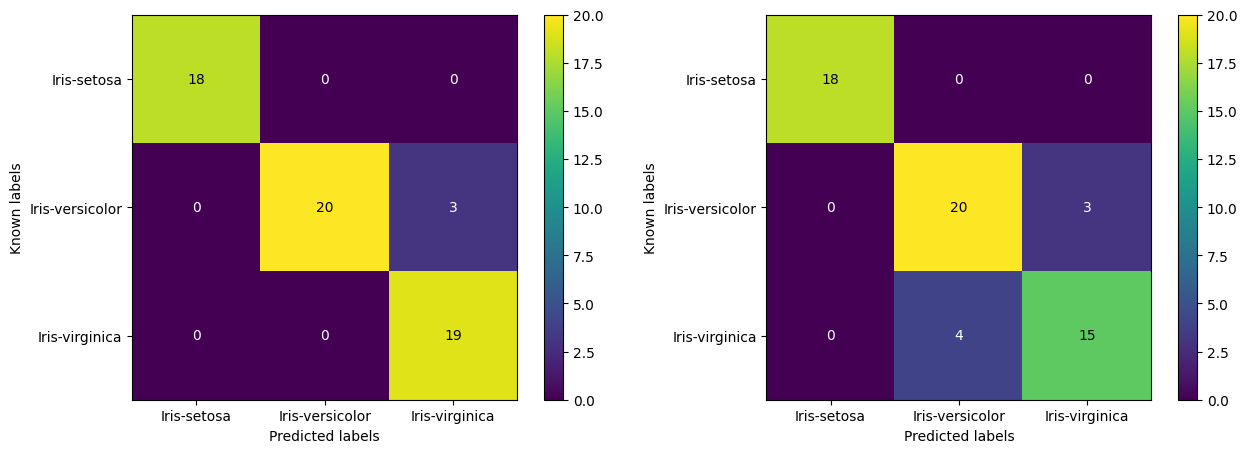

In [6]:
# comparons les matrices de confusions sur le test_set
iris_c_matrix = confusion_matrix(Iris.class_number, iris_test_y, iris_pred)
iris_c_matrix_bagging = confusion_matrix(Iris.class_number, iris_test_y, iris_pred_bagging)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(iris_c_matrix, Iris.class_names, ax=ax1)
show_confusion_matrix(iris_c_matrix_bagging, Iris.class_names, ax=ax2)

print(f"Accuracy score without bagging: {accuracy_score(iris_test_y, iris_pred):.3f}")
print(f"Accuracy score with bagging : {accuracy_score(iris_test_y, iris_pred_bagging):.3f}")

### Conclusions
Sur des dataset simplistes, aucune différence notable n'est à signaler.

## Comparaison, avec ou sans bagging: eMNIST

In [7]:
# arbre sans bagging
emnist_tree = DecisionTree(max_depth=8, splitter="best", do_bagging=False)
emnist_tree.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred = emnist_tree.predict(emnist_compressed_test_x)
emnist_pred_train_y = emnist_tree.predict(emnist_compressed_train_x)

In [8]:
# arbre avec bagging
emnist_tree_bagging = DecisionTree(max_depth=8, splitter="best", do_bagging=True)
emnist_tree_bagging.fit(emnist_compressed_train_x, emnist_train_y)
emnist_pred_bagging = emnist_tree_bagging.predict(emnist_compressed_test_x)
emnist_pred_train_y_bagging = emnist_tree_bagging.predict(emnist_compressed_train_x)

Accuracy score without bagging: 0.589
Accuracy score with bagging : 0.447


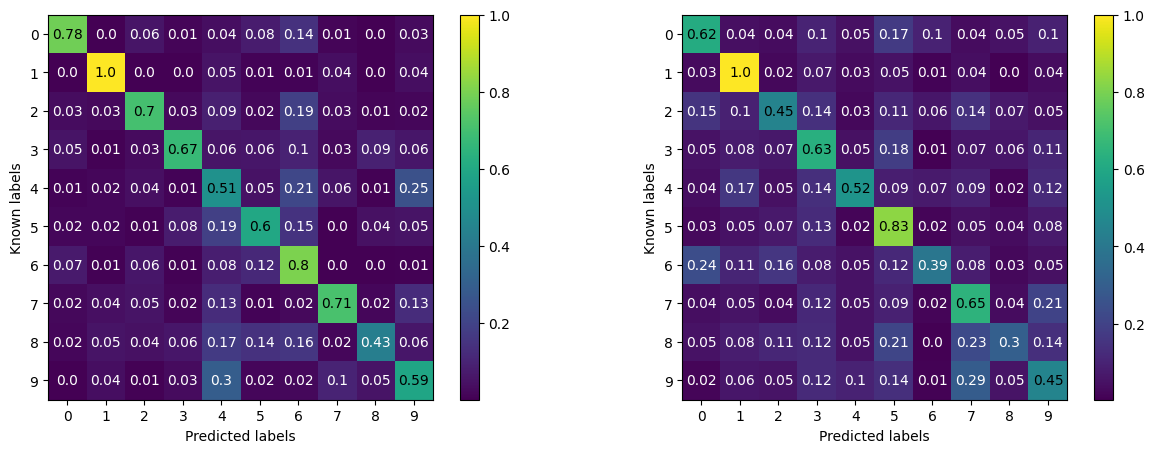

In [9]:
# comparons les matrices de confusions sur le test_set
emnist_c_matrix = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred)
emnist_c_matrix_bagging = confusion_matrix(Emnist.class_number, emnist_test_y, emnist_pred_bagging)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix, Emnist.class_names, ax=ax1, round_decimal=2)
show_confusion_matrix(emnist_c_matrix_bagging, Emnist.class_names, ax=ax2, round_decimal=2)

print(f"Accuracy score without bagging: {accuracy_score(emnist_test_y, emnist_pred):.3f}")
print(f"Accuracy score with bagging : {accuracy_score(emnist_test_y, emnist_pred_bagging):.3f}")

Accuracy score without bagging: 0.762
Accuracy score with bagging : 0.661


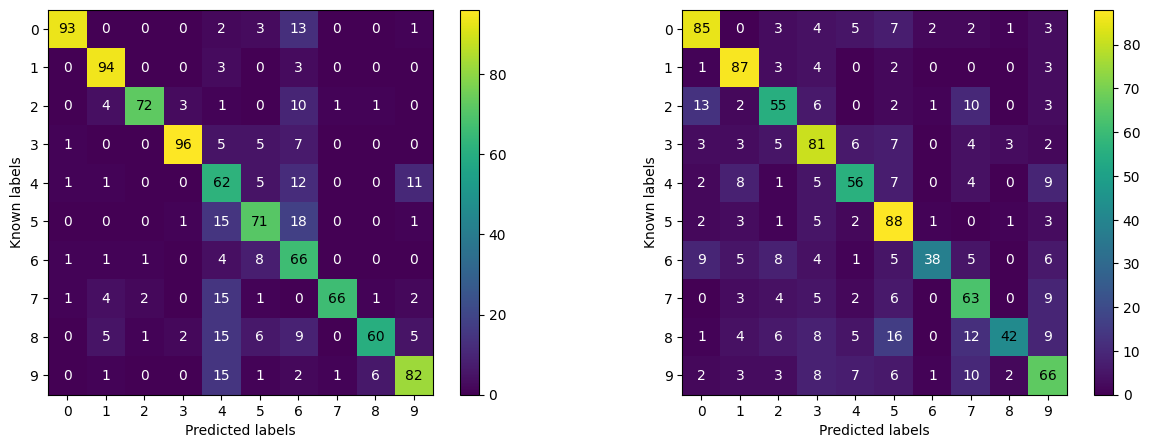

In [10]:
# comparons les matrices de confusions sur le train_set
emnist_c_matrix = confusion_matrix(Emnist.class_number, emnist_train_y, emnist_pred_train_y)
emnist_c_matrix_bagging = confusion_matrix(Emnist.class_number, emnist_train_y, emnist_pred_train_y_bagging)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
show_confusion_matrix(emnist_c_matrix, Emnist.class_names, ax=ax1)
show_confusion_matrix(emnist_c_matrix_bagging, Emnist.class_names, ax=ax2)

print(f"Accuracy score without bagging: {accuracy_score(emnist_train_y, emnist_pred_train_y):.3f}")
print(f"Accuracy score with bagging : {accuracy_score(emnist_train_y, emnist_pred_train_y_bagging):.3f}")

### Conclusions